In [1]:

import glob
import os

import cv2
import numpy as np

from misc.patch_extractor import PatchExtractor
from misc.utils import rm_n_mkdir

from config import Config

###########################################################################

cfg = Config()

extract_type = 'mirror' # 'valid' for fcn8 segnet etc.
                        # 'mirror' for u-net etc.
# check the patch_extractor.py 'main' to see the different

# orignal size (win size) - input size - output size (step size)
# 512x512 - 256x256 - 256x256 fcn8, dcan, segnet
# 536x536 - 268x268 - 84x84   unet, dist
# 540x540 - 270x270 - 80x80   xy, hover
# 504x504 - 252x252 - 252x252 micronet
step_size = [80, 80] # should match self.train_mask_shape (config.py) 
win_size  = [540, 540] # should be at least twice time larger than 
                        # self.train_base_shape (config.py) to reduce 
                        # the padding effect during augmentation

xtractor = PatchExtractor(win_size, step_size)

### Paths to data - these need to be modified according to where the original data is stored
"""
img_ext = '.png'
img_dir = '../../../data/CoNSeP/train/Images/'
ann_dir = '../../../data/CoNSeP/train/Labels/' 
####
out_dir = "../../../CoNSeP/train/%dx%d_%dx%d" % \
                    (win_size[0], win_size[1], step_size[0], step_size[1])
"""

consep_image = "/usr/local/opt/work/hover_net_modified/CoNSeP/Train/Images/train_3.png"
consep_label = "/usr/local/opt/work/hover_net_modified/CoNSeP/Train/Labels/train_3.mat"
monusac_image = "/usr/local/opt/work/hover_net_modified/MoNuSAC/TCGA-5P-A9K0-01Z-00-DX1/TCGA-5P-A9K0-01Z-00-DX1_1.tif"
monusac_label = ""


In [2]:
import os
import openslide
from xml.dom import minidom
import numpy as np
import openslide
from openslide import open_slide  
from glob import glob
import cv2
import matplotlib.pyplot as plt
import scipy.io as sio
from PIL import Image
import scipy
import scipy.ndimage
from shapely.geometry import Polygon
from skimage import draw
import xml.etree.ElementTree as ET
import argparse

In [10]:
mat_file = '/usr/local/opt/work/hover_net_modified/MoNuSAC_processed/Labels/TCGA-A2-A0ES-01Z-00-DX1_1.mat' 
ann = sio.loadmat(mat_file)

In [17]:
np.unique(ann['inst_map'])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19.])

In [18]:
np.unique(ann['class_map'])

array([0., 2., 3.])

In [3]:
img_dir = '/usr/local/opt/work/hover_net_modified/MoNuSAC_processed/Images/TCGA-55-1594-01Z-00-DX1_001.png'
img = cv2.imread(img_dir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

In [6]:
step_size = [80, 80] # should match self.train_mask_shape (config.py) 
win_size  = [540, 540] # should be at least twice time larger than 
                        # self.train_base_shape (config.py) to reduce 
                        # the padding effect during augmentation
### Paths to data - these need to be modified according to where the original data is stored
img_ext = '.png'
img_dir = '/usr/local/opt/work/hover_net_modified/MoNuSAC_processed/Images/'
ann_dir = '/usr/local/opt/work/hover_net_modified/MoNuSAC_processed/Labels/' 
####
out_dir = "/usr/local/opt/work/hover_net_modified/MoNuSAC_processed/Images/%dx%d_%dx%d" % \
                    (win_size[0], win_size[1], step_size[0], step_size[1])

In [69]:
data = np.load(out_dir +'/TCGA-55-1594-01Z-00-DX1_001_001.npy')

In [70]:
img = data[:,:,:3]
ann = data[:,:,3:]

In [71]:
img.shape

(540, 540, 3)

In [78]:
def func(arr):
    (unique, counts) = np.unique(arr, return_counts=True)
    frequencies = np.asarray((unique, counts)).T
    return frequencies

In [79]:
func(img)

array([[  23,    4],
       [  24,   12],
       [  26,   16],
       [  27,   10],
       [  28,   12],
       [  29,   24],
       [  30,   52],
       [  31,   32],
       [  32,   58],
       [  33,   44],
       [  34,   56],
       [  35,  112],
       [  36,  108],
       [  37,  186],
       [  38,  184],
       [  39,  200],
       [  40,  226],
       [  41,  294],
       [  42,  308],
       [  43,  290],
       [  44,  365],
       [  45,  308],
       [  46,  408],
       [  47,  510],
       [  48,  529],
       [  49,  443],
       [  50,  547],
       [  51,  640],
       [  52,  590],
       [  53,  573],
       [  54,  626],
       [  55,  742],
       [  56,  659],
       [  57,  755],
       [  58,  705],
       [  59,  869],
       [  60,  813],
       [  61,  887],
       [  62,  929],
       [  63,  970],
       [  64,  932],
       [  65,  948],
       [  66, 1189],
       [  67, 1120],
       [  68, 1090],
       [  69, 1130],
       [  70, 1276],
       [  71,

In [80]:
func(data[:,:,3])

array([[     0, 248746],
       [    17,   1976],
       [    29,    138],
       [    50,    332],
       [    52,   6824],
       [    63,   2352],
       [    88,   3496],
       [    89,   1940],
       [   109,   4040],
       [   129,   1302],
       [   149,    414],
       [   151,    486],
       [   184,   1008],
       [   213,   1314],
       [   229,   1964],
       [   232,    760],
       [   233,   1012],
       [   234,   1064],
       [   235,    552],
       [   236,   1532],
       [   237,   1736],
       [   238,    822],
       [   239,    414],
       [   240,    828],
       [   241,    638],
       [   246,   1340],
       [   247,    870],
       [   249,   1568],
       [   250,   1288],
       [   251,    844]])

In [81]:
func(data[:,:,4])

array([[     0, 248746],
       [     1,  27586],
       [     2,  15268]])

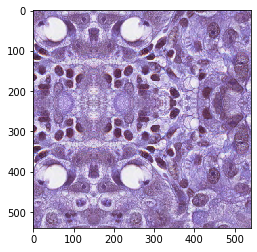

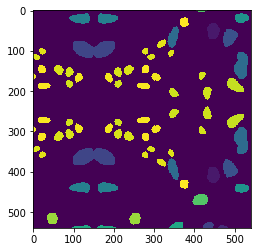

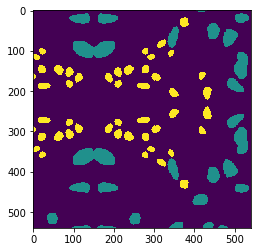

In [83]:
plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(data[:,:,3])
plt.figure()
plt.imshow(data[:,:,4])

In [ ]:

import glob
import os

import cv2
import numpy as np
import scipy.io as sio
from misc.patch_extractor import PatchExtractor
from misc.utils import rm_n_mkdir

from config import Config
    
cfg = Config()

extract_type = 'mirror' # 'valid' for fcn8 segnet etc.
                        # 'mirror' for u-net etc.
# check the patch_extractor.py 'main' to see the different

# orignal size (win size) - input size - output size (step size)
# 512x512 - 256x256 - 256x256 fcn8, dcan, segnet
# 536x536 - 268x268 - 84x84   unet, dist
# 540x540 - 270x270 - 80x80   xy, hover
# 504x504 - 252x252 - 252x252 micronet
step_size = [80, 80] # should match self.train_mask_shape (config.py) 
win_size  = [540, 540] # should be at least twice time larger than 
                        # self.train_base_shape (config.py) to reduce 
                        # the padding effect during augmentation

xtractor = PatchExtractor(win_size, step_size)

### Paths to data - these need to be modified according to where the original data is stored
img_ext = '.png'
img_dir = '/usr/local/opt/work/hover_net_modified/MoNuSAC_processed/Images'
ann_dir = '/usr/local/opt/work/hover_net_modified/MoNuSAC_processed/Labels' 
####
out_dir = "/usr/local/opt/work/hover_net_modified/MoNuSAC_processed/Images" % \
                    (win_size[0], win_size[1], step_size[0], step_size[1])

file_list = glob.glob('%s/*%s' % (img_dir, img_ext))
file_list.sort() 

rm_n_mkdir(out_dir)
for filename in file_list:
    filename = os.path.basename(filename)
    basename = filename.split('.')[0]
    print(filename)

    img = cv2.imread(img_dir + basename + img_ext)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    if cfg.type_classification:
        # assumes that ann is HxWx2 (nuclei class labels are available at index 1 of C) 
        ann = sio.loadmat(ann_dir + basename + '.mat')
        ann_inst = ann['inst_map']
        ann_type = ann['class_map']

        assert np.max(ann_type) <= cfg.nr_types-1, \
                        "Only %d types of nuclei are defined for training"\
                        "but there are %d types found in the input image." % (cfg.nr_types, np.max(ann_type)) 

        ann = np.dstack([ann_inst, ann_type])
        ann = ann.astype('int32')             
    else:
        # assumes that ann is HxW
        ann_inst = np.load(ann_dir + basename + '.mat')
        ann_inst = (ann_inst['inst_map']).astype('int32')
        ann = np.expand_dims(ann_inst, -1)
    
    img = np.concatenate([img, ann], axis=-1)
    sub_patches = xtractor.extract(img, extract_type)
    for idx, patch in enumerate(sub_patches):
        np.save("{0}/{1}_{2:03d}.npy".format(out_dir, basename, idx), patch)


In [47]:

data_path = '/usr/local/opt/work/hover_net_modified/MoNuSAC'
patients = [x[0] for x in os.walk(data_path)]#Total patients in the data_path
print('No. of Patients: ',len(patients))

shapes = dict()
for patient_loc in patients:
    patient_name = patient_loc[len(data_path)+1:]#Patient name        
    """## To make patient's name directory in the destination folder
    try:
        os.mkdir(patient_name)
    except OSError:
        print ("\n Creation of the patient's directory %s failed" % patient_name)
    """    
    ## Read sub-images of each patient in the data path        
    sub_images = glob(patient_loc+'/*.tif')
    for sub_image_loc in sub_images:

            gt = 0
            sub_image_name = sub_image_loc[len(data_path)+len(patient_name)+1:-4]        
            
            ## To make sub_image directory under the patient's folder
            """
            sub_image = './'+patient_name+'/'+sub_image_name #Destination path
            try:
                os.mkdir(sub_image)
            except OSError:
                print ("\n Creation of the patient's directory %s failed" % sub_image)
            """    
            image_name = sub_image_loc
            img = cv2.imread(image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            #print(sub_image_name,' : ', img.shape)
            shapes[sub_image_name] = img.shape
            #plt.figure()
            #plt.imshow(img)
    
    

No. of Patients:  47


## Ignore this Specific Image from MoNuSAC


/TCGA-P4-AAVK-01Z-00-DX1_6 (173, 74, 3)

In [66]:
for key,value in shapes.items():
    if((value[0] < 80) | (value[1] < 80)):
        print(key,value)

/TCGA-P4-AAVK-01Z-00-DX1_6 (173, 74, 3)


In [49]:
shapes['/TCGA-P4-AAVK-01Z-00-DX1_6']

(173, 74, 3)

In [52]:
accepted = ('TCGA-55-1594-01Z-00-DX1_001','TCGA-55-1594-01Z-00-DX1_002','TCGA-55-1594-01Z-00-DX1_003','TCGA-55-1594-01Z-00-DX1_004','TCGA-55-1594-01Z-00-DX1_005','TCGA-5P-A9K0-01Z-00-DX1_1','TCGA-5P-A9K0-01Z-00-DX1_2','TCGA-5P-A9K0-01Z-00-DX1_3','TCGA-69-7760-01Z-00-DX1_001','TCGA-69-7760-01Z-00-DX1_002','TCGA-69-7760-01Z-00-DX1_003','TCGA-69-7760-01Z-00-DX1_004','TCGA-69-A59K-01Z-00-DX1_001','TCGA-69-A59K-01Z-00-DX1_002','TCGA-69-A59K-01Z-00-DX1_003','TCGA-69-A59K-01Z-00-DX1_004','TCGA-73-4668-01Z-00-DX1_001','TCGA-73-4668-01Z-00-DX1_002','TCGA-73-4668-01Z-00-DX1_003','TCGA-73-4668-01Z-00-DX1_004','TCGA-78-7220-01Z-00-DX1_001','TCGA-78-7220-01Z-00-DX1_002','TCGA-78-7220-01Z-00-DX1_003','TCGA-78-7220-01Z-00-DX1_004','TCGA-86-7713-01Z-00-DX1_001','TCGA-86-7713-01Z-00-DX1_002','TCGA-86-7713-01Z-00-DX1_003','TCGA-86-7713-01Z-00-DX1_004','TCGA-86-8672-01Z-00-DX1_1','TCGA-86-8672-01Z-00-DX1_2','TCGA-86-8672-01Z-00-DX1_3','TCGA-A2-A0CV-01Z-00-DX1_1','TCGA-A2-A0CV-01Z-00-DX1_2','TCGA-A2-A0CV-01Z-00-DX1_3','TCGA-A2-A0CV-01Z-00-DX1_4','TCGA-A2-A0CV-01Z-00-DX1_5','TCGA-A2-A0ES-01Z-00-DX1_1','TCGA-A2-A0ES-01Z-00-DX1_2','TCGA-A2-A0ES-01Z-00-DX1_3','TCGA-A2-A0ES-01Z-00-DX1_4','TCGA-A2-A0ES-01Z-00-DX1_5','TCGA-B6-A0WZ-01Z-00-DX1_1','TCGA-B6-A0WZ-01Z-00-DX1_2','TCGA-B6-A0WZ-01Z-00-DX1_3','TCGA-B6-A0WZ-01Z-00-DX1_4','TCGA-B6-A0WZ-01Z-00-DX1_5','TCGA-B6-A0WZ-01Z-00-DX1_6','TCGA-B9-A44B-01Z-00-DX1_1','TCGA-B9-A44B-01Z-00-DX1_2','TCGA-B9-A44B-01Z-00-DX1_3','TCGA-B9-A8YI-01Z-00-DX1_1','TCGA-B9-A8YI-01Z-00-DX1_2','TCGA-B9-A8YI-01Z-00-DX1_3','TCGA-B9-A8YI-01Z-00-DX1_4','TCGA-B9-A8YI-01Z-00-DX1_5','TCGA-BH-A18T-01Z-00-DX1_1','TCGA-BH-A18T-01Z-00-DX1_2','TCGA-BH-A18T-01Z-00-DX1_3','TCGA-BH-A18T-01Z-00-DX1_4','TCGA-BH-A18T-01Z-00-DX1_5','TCGA-BH-A18T-01Z-00-DX1_6','TCGA-D8-A1X5-01Z-00-DX2_1','TCGA-D8-A1X5-01Z-00-DX2_2','TCGA-D8-A1X5-01Z-00-DX2_3','TCGA-D8-A1X5-01Z-00-DX2_4','TCGA-DW-7841-01Z-00-DX1_1','TCGA-DW-7841-01Z-00-DX1_2','TCGA-DW-7841-01Z-00-DX1_3','TCGA-E2-A154-01Z-00-DX1_1','TCGA-E2-A154-01Z-00-DX1_2','TCGA-E2-A154-01Z-00-DX1_3','TCGA-E2-A154-01Z-00-DX1_4','TCGA-E2-A154-01Z-00-DX1_5','TCGA-E2-A154-01Z-00-DX1_6','TCGA-E2-A154-01Z-00-DX1_7','TCGA-E2-A154-01Z-00-DX1_8','TCGA-E9-A22B-01Z-00-DX1_1','TCGA-E9-A22B-01Z-00-DX1_2','TCGA-E9-A22B-01Z-00-DX1_3','TCGA-E9-A22B-01Z-00-DX1_4','TCGA-E9-A22B-01Z-00-DX1_5','TCGA-E9-A22B-01Z-00-DX1_6','TCGA-E9-A22B-01Z-00-DX1_7','TCGA-E9-A22B-01Z-00-DX1_8','TCGA-E9-A22G-01Z-00-DX1_1','TCGA-E9-A22G-01Z-00-DX1_2','TCGA-E9-A22G-01Z-00-DX1_3','TCGA-E9-A22G-01Z-00-DX1_4','TCGA-E9-A22G-01Z-00-DX1_5','TCGA-EJ-5495-01Z-00-DX1-1','TCGA-EJ-5495-01Z-00-DX1-2','TCGA-EJ-5495-01Z-00-DX1-3','TCGA-EJ-5495-01Z-00-DX1-4','TCGA-EJ-5505-01Z-00-DX1-1','TCGA-EJ-5505-01Z-00-DX1-2','TCGA-EJ-5505-01Z-00-DX1-3','TCGA-EJ-5505-01Z-00-DX1-4','TCGA-EJ-5505-01Z-00-DX1-5','TCGA-EJ-5505-01Z-00-DX1-6','TCGA-EJ-5517-01Z-00-DX1-1','TCGA-EJ-5517-01Z-00-DX1-2','TCGA-EJ-5517-01Z-00-DX1-3','TCGA-EJ-5517-01Z-00-DX1-4','TCGA-EV-5903-01Z-00-DX1_1','TCGA-EV-5903-01Z-00-DX1_2','TCGA-EV-5903-01Z-00-DX1_3','TCGA-EV-5903-01Z-00-DX1_4','TCGA-EV-5903-01Z-00-DX1_5','TCGA-EW-A6SD-01Z-00-DX1_1','TCGA-EW-A6SD-01Z-00-DX1_2','TCGA-EW-A6SD-01Z-00-DX1_3','TCGA-EW-A6SD-01Z-00-DX1_4','TCGA-EW-A6SD-01Z-00-DX1_5','TCGA-F9-A97G-01Z-00-DX1_1','TCGA-F9-A97G-01Z-00-DX1_2','TCGA-F9-A97G-01Z-00-DX1_3','TCGA-F9-A97G-01Z-00-DX1_4','TCGA-G7-A8LD-01Z-00-DX1_1','TCGA-G7-A8LD-01Z-00-DX1_10','TCGA-G7-A8LD-01Z-00-DX1_2','TCGA-G7-A8LD-01Z-00-DX1_3','TCGA-G7-A8LD-01Z-00-DX1_4','TCGA-G7-A8LD-01Z-00-DX1_5','TCGA-G7-A8LD-01Z-00-DX1_6','TCGA-G7-A8LD-01Z-00-DX1_7','TCGA-G7-A8LD-01Z-00-DX1_8','TCGA-G7-A8LD-01Z-00-DX1_9','TCGA-G9-6342-01Z-00-DX1-1','TCGA-G9-6342-01Z-00-DX1-2','TCGA-G9-6499-01Z-00-DX1-1','TCGA-G9-6499-01Z-00-DX1-2','TCGA-G9-6499-01Z-00-DX1-3','TCGA-G9-6499-01Z-00-DX1-4','TCGA-G9-6499-01Z-00-DX1-5','TCGA-J4-A67Q-01Z-00-DX1-1','TCGA-J4-A67Q-01Z-00-DX1-2','TCGA-J4-A67Q-01Z-00-DX1-3','TCGA-J4-A67Q-01Z-00-DX1-4','TCGA-J4-A67Q-01Z-00-DX1-5','TCGA-J4-A67T-01Z-00-DX1-1','TCGA-J4-A67T-01Z-00-DX1-2','TCGA-J4-A67T-01Z-00-DX1-3','TCGA-J4-A67T-01Z-00-DX1-4','TCGA-J4-A67T-01Z-00-DX1-5','TCGA-J4-A67T-01Z-00-DX1-6','TCGA-KK-A59X-01Z-00-DX1-1','TCGA-KK-A59X-01Z-00-DX1-2','TCGA-KK-A59X-01Z-00-DX1-3','TCGA-KK-A6E0-01Z-00-DX1-1','TCGA-KK-A6E0-01Z-00-DX1-2','TCGA-KK-A6E0-01Z-00-DX1-3','TCGA-KK-A6E0-01Z-00-DX1-4','TCGA-KK-A6E0-01Z-00-DX1-5','TCGA-KK-A7AW-01Z-00-DX1-1','TCGA-L4-A4E5-01Z-00-DX1_1','TCGA-L4-A4E5-01Z-00-DX1_2','TCGA-L4-A4E5-01Z-00-DX1_3','TCGA-MH-A560-01Z-00-DX2_1','TCGA-MH-A560-01Z-00-DX2_2','TCGA-MH-A560-01Z-00-DX2_3','TCGA-MH-A560-01Z-00-DX2_4','TCGA-MP-A4SY-01Z-00-DX1_1','TCGA-MP-A4SY-01Z-00-DX1_2','TCGA-MP-A4SY-01Z-00-DX1_3','TCGA-MP-A4SY-01Z-00-DX1_4','TCGA-MP-A4T7-01Z-00-DX1_1','TCGA-MP-A4T7-01Z-00-DX1_2','TCGA-MP-A4T7-01Z-00-DX1_3','TCGA-MP-A4T7-01Z-00-DX1_4','TCGA-P4-AAVK-01Z-00-DX1_1','TCGA-P4-AAVK-01Z-00-DX1_2','TCGA-P4-AAVK-01Z-00-DX1_3','TCGA-P4-AAVK-01Z-00-DX1_4','TCGA-P4-AAVK-01Z-00-DX1_5')

In [54]:
len(accepted)

174

In [53]:
for img in accepted:
    print(shapes['/'+img])

(1024, 1024, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(1153, 1307, 3)
(763, 756, 3)
(185, 497, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(1024, 1024, 3)
(182, 177, 3)
(382, 298, 3)
(1422, 2162, 3)
(692, 680, 3)
(591, 778, 3)
(1024, 1024, 3)
(220, 259, 3)
(358, 941, 3)
(512, 512, 3)
(512, 512, 3)
(1024, 1024, 3)
(512, 512, 3)
(446, 627, 3)
(687, 712, 3)
(828, 535, 3)
(1232, 925, 3)
(766, 570, 3)
(986, 1984, 3)
(1492, 1311, 3)
(610, 610, 3)
(552, 685, 3)
(214, 187, 3)
(677, 769, 3)
(172, 196, 3)
(313, 474, 3)
(666, 1266, 3)
(211, 344, 3)
(909, 898, 3)
(500, 500, 3)
(1678, 1463, 3)
(397, 276, 3)
(263, 306, 3)
(379, 506, 3)
(526, 669, 3)
(160, 543, 3)
(464, 633, 3)
(1136, 1445, 3)
(123, 254, 3)
(1311, 1449, 3)
(843, 1042, 3)
(1302, 1730, 3)
(283, 221, 3)
(273, 232, 3)
(917, 1301, 3)
(535, 711, 3)
(419, 497, 3)
(447, 373, 3)
(922, 771, 3)
(961, 1211, 3)
(205, 382, 3)
(1104, 1236, 3)
(1254, 1796, 3)
(811, 1056, 3)
(887, 878, 3)
(821, 932, 3)
(424, 375, 3)
(475, 469, 3)
(

In [53]:
def smaller_images(thresh, img_shapes):
    for val in img_shapes:
        if val < thresh:
            yield val

In [ ]:


def main(input_loc, output_loc):

    # Read svs files from the desired path
    count = 0
    if(input_loc):
        data_path = input_loc
    else:
        data_path = '/usr/local/opt/work/hover_net_modified/MoNuSAC' #Path to read data from
    if(output_loc):
        destination_path = output_loc # Path to save n-ary masks corresponding to xml files
    else:
        destination_path = '/usr/local/opt/work/hover_net_modified/'

    os.chdir(destination_path)

    # Create MoNuSAC folder
    try:
        os.mkdir(destination_path+'/MoNuSAC_processed')
    except OSError:
        print ("Creation of the mask directory %s failed" % destination_path)
    
    # Create sub-folders in the same pattern as CoNSeP 
    # -- Images
    # -- Labels
    # -- Overlay
    try:
        os.mkdir(destination_path+'/MoNuSAC_processed/Images')
    except OSError:
        print ("Creation of the mask directory %s failed" % (destination_path + "\Images"))
    try:
        os.mkdir(destination_path+'\MoNuSAC_processed\Labels')
    except OSError:
        print ("Creation of the mask directory %s failed\Overlay" % (destination_path + "\Labels"))

    os.chdir(destination_path+'/MoNuSAC_processed')#Create folder named as MoNuSAC_masks
    patients = [x[0] for x in os.walk(data_path)]#Total patients in the data_path
    print('No. of Patients: ',len(patients))


    for patient_loc in patients:
        patient_name = patient_loc[len(data_path)+1:]#Patient name        
        """## To make patient's name directory in the destination folder
        try:
            os.mkdir(patient_name)
        except OSError:
            print ("\n Creation of the patient's directory %s failed" % patient_name)
        """    
        ## Read sub-images of each patient in the data path        
        sub_images = glob(patient_loc+'/*.svs')
        for sub_image_loc in sub_images:

            gt = 0
            sub_image_name = sub_image_loc[len(data_path)+len(patient_name)+1:-4]        
            print('File Name being processed:', sub_image_name)
            
            ## To make sub_image directory under the patient's folder
            """
            sub_image = './'+patient_name+'/'+sub_image_name #Destination path
            try:
                os.mkdir(sub_image)
            except OSError:
                print ("\n Creation of the patient's directory %s failed" % sub_image)
            """    
            image_name = sub_image_loc
            img = openslide.OpenSlide(image_name)
                                    
            # If svs image needs to save in png
            cv2.imwrite(destination_path+'/MoNuSAC_processed/Images/'+sub_image_name+'.png', np.array(img.read_region((0,0),0,img.level_dimensions[0])))      
    
            # Read xml file
            xml_file_name  = image_name[:-4]
            xml_file_name = xml_file_name+'.xml'
            tree = ET.parse(xml_file_name)
            root = tree.getroot()
            
            #Generate n-ary mask for each cell-type                         
            for k in range(len(root)):
                label = [x.attrib['Name'] for x in root[k][0]]
                label = label[0]
                
                for child in root[k]:
                    for x in child:
                        r = x.tag
                        if r == 'Attribute':
                            count = count+1
                            print(count)
                            label = x.attrib['Name']
                            n_ary_mask = np.transpose(np.zeros((img.read_region((0,0),0,img.level_dimensions[0]).size))) 
                            print(label)
                            
                            # Create directory for each label
                            sub_path = sub_image+'/'+label
                            
                            try:
                                os.mkdir(sub_path)
                            except OSError:
                                print ("Creation of the directory %s failed" % label)
                            else:
                                print ("Successfully created the directory %s " % label) 
                                            
                            
                        if r == 'Region':
                            regions = []
                            vertices = x[1]
                            coords = np.zeros((len(vertices), 2))
                            for i, vertex in enumerate(vertices):
                                coords[i][0] = vertex.attrib['X']
                                coords[i][1] = vertex.attrib['Y']        
                            regions.append(coords)
                            poly = Polygon(regions[0])  
                            
                            vertex_row_coords = regions[0][:,0]
                            vertex_col_coords = regions[0][:,1]
                            fill_row_coords, fill_col_coords = draw.polygon(vertex_col_coords, vertex_row_coords, n_ary_mask.shape)
                            gt = gt+1 #Keep track of giving unique valu to each instance in an image
                            n_ary_mask[fill_row_coords, fill_col_coords] = gt
                            mask_path = sub_path+'/'+str(count)+'_mask.tif'
                            cv2.imwrite(mask_path, n_ary_mask)       

    


In [ ]:
img = cv2.imread(img_dir + basename + img_ext)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

if cfg.type_classification:
    # assumes that ann is HxWx2 (nuclei class labels are available at index 1 of C) 
    ann = sio.loadmat(ann_dir + basename + '.mat')
    ann_inst = ann['inst_map']
    ann_type = ann['class_map']
    
    # merge classes for CoNSeP (in paper we only utilise 3 nuclei classes and background)
    # If own dataset is used, then the below may need to be modified
    ann_type[(ann_type == 3) | (ann_type == 4)] = 3
    ann_type[(ann_type == 5) | (ann_type == 6) | (ann_type == 7)] = 4

    assert np.max(ann_type) <= cfg.nr_types-1, \
                    "Only %d types of nuclei are defined for training"\
                    "but there are %d types found in the input image." % (cfg.nr_types, np.max(ann_type)) 

    ann = np.dstack([ann_inst, ann_type])
    ann = ann.astype('int32')             
else:
    # assumes that ann is HxW
    ann_inst = np.load(ann_dir + basename + '.mat')
    ann_inst = (ann_inst['inst_map']).astype('int32')
    ann = np.expand_dims(ann_inst, -1)

img = np.concatenate([img, ann], axis=-1)
sub_patches = xtractor.extract(img, extract_type)
for idx, patch in enumerate(sub_patches):
        np.save("{0}/{1}_{2:03d}.npy".format(out_dir, basename, idx), patch)